In [1]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Veri setini yükleyin
file_path = 'dermatology.data'  # Dosya yolunu güncelleyin
data = pd.read_csv(file_path, header=None)

# Sütun isimlerini tanımlayın
column_names = [
    'erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 
    'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 
    'melanin_incontinence', 'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
    'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis', 
    'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges', 
    'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis',
    'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 
    'disappearance_of_the_granular_layer', 'vacuolisation_and_damage_of_basal_layer',
    'spongiosis', 'saw_tooth_appearance_of_retes', 'follicular_horn_plug', 
    'perifollicular_parakeratosis', 'inflammatory_monoluclear_infiltrate', 
    'band_like_infiltrate', 'Age', 'Class'
]

# Sütun isimlerini veri setine ekleyin
data.columns = column_names

# İlk birkaç satırı kontrol edin
data.head()


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_infiltrate,band_like_infiltrate,Age,Class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [2]:
# İstatistiksel özet
data.describe()


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_infiltrate,band_like_infiltrate,Class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


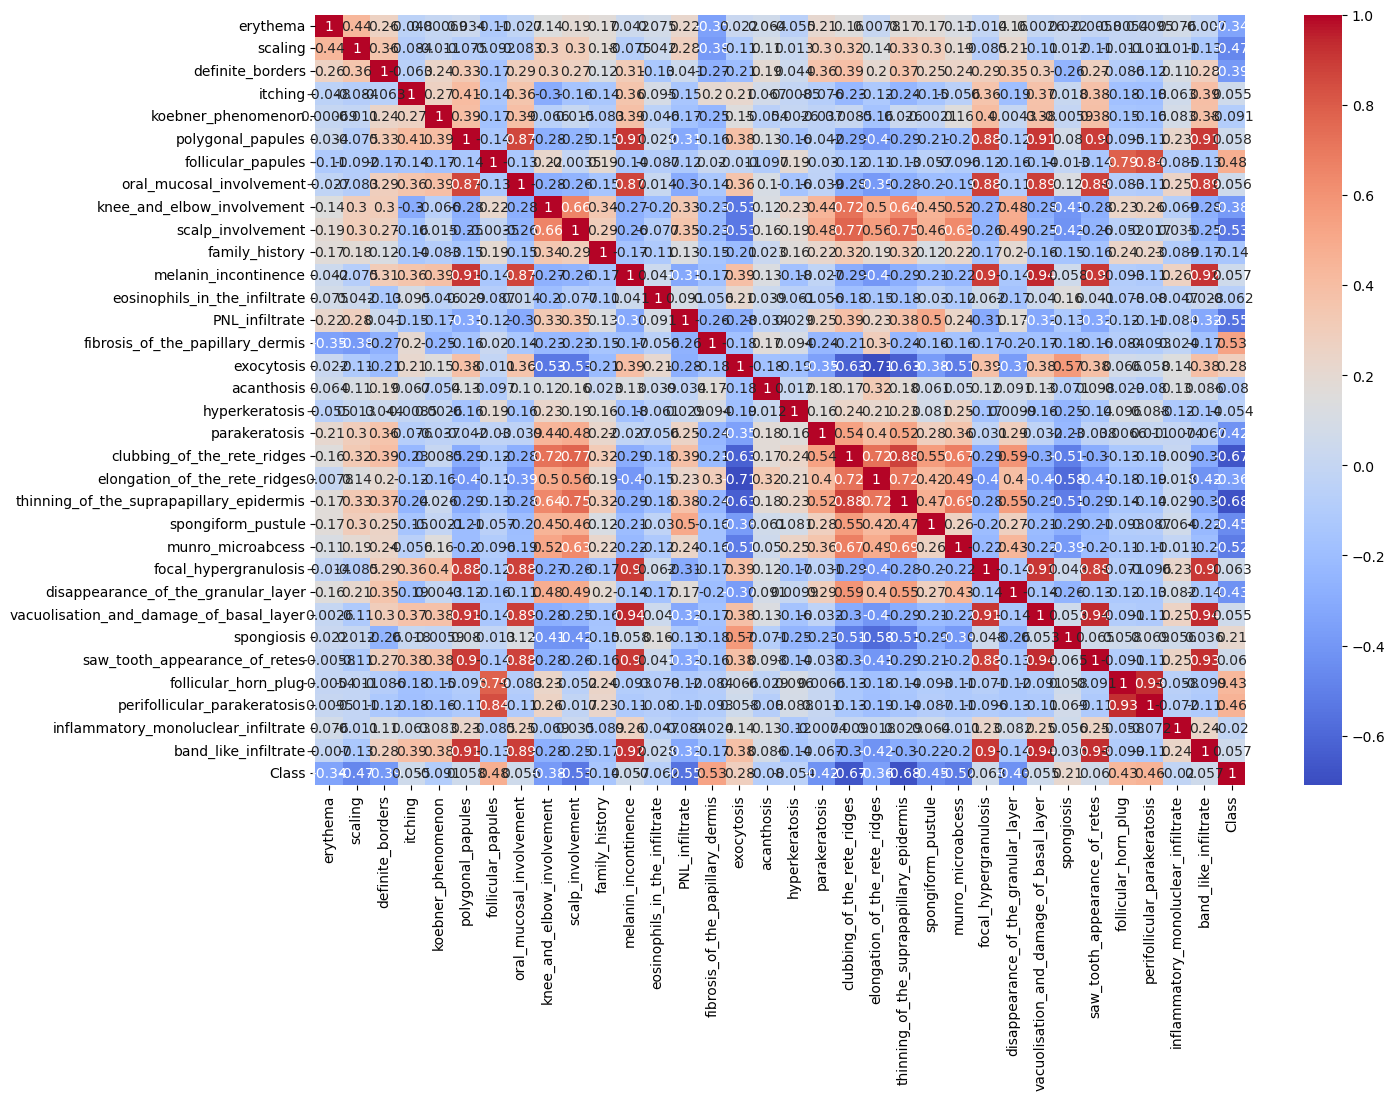

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisi
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


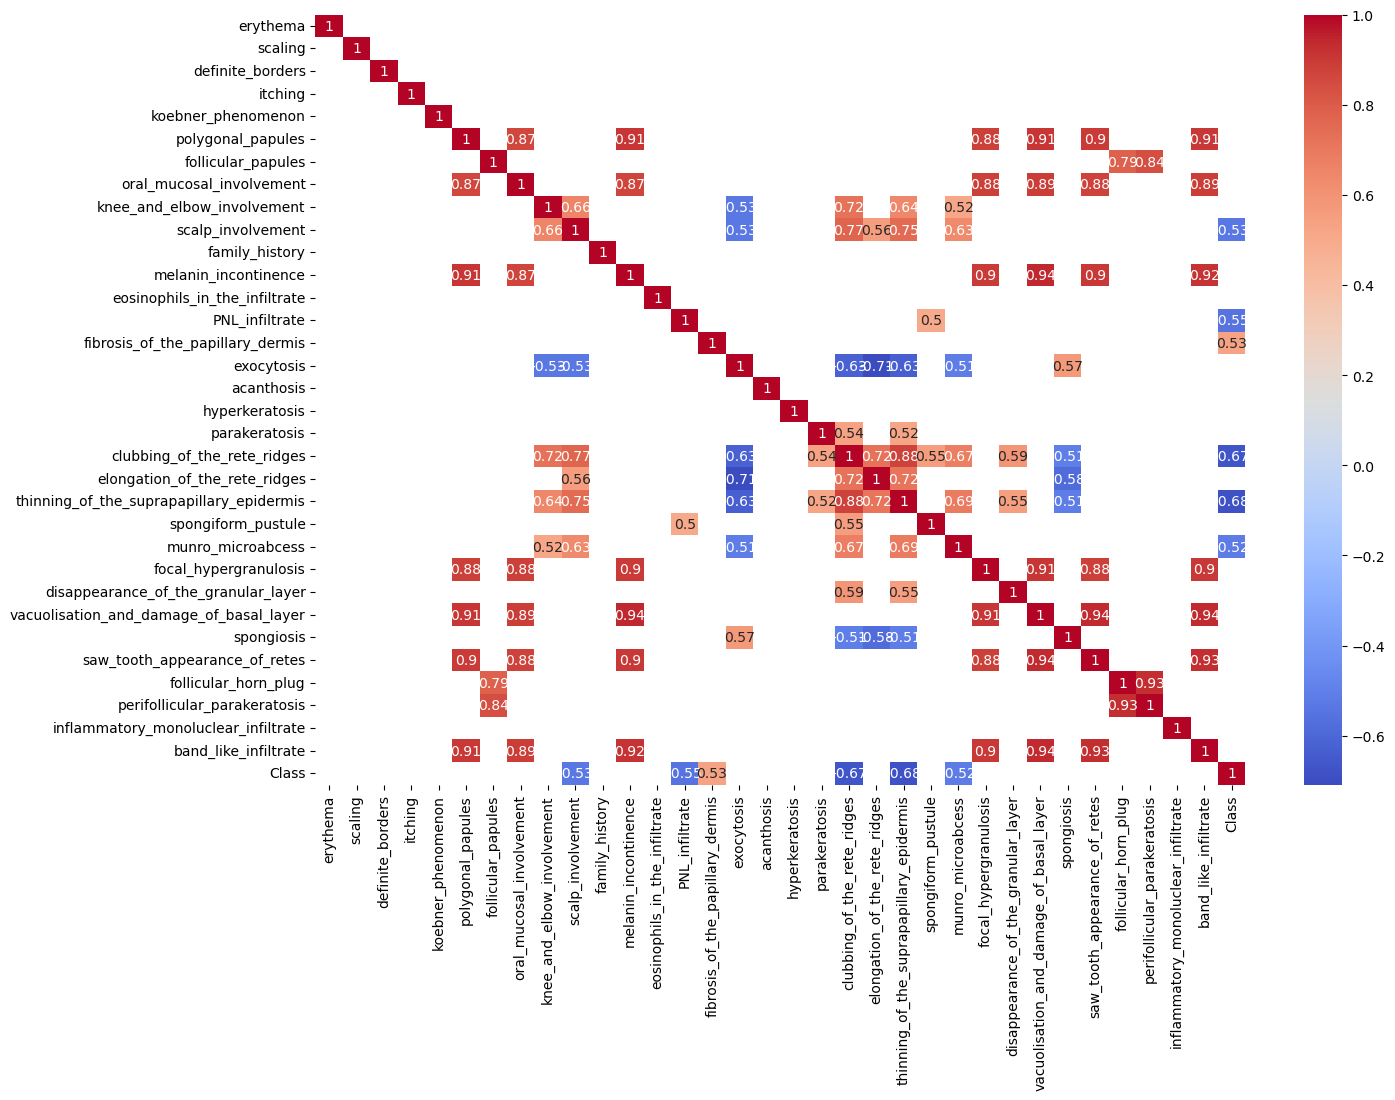

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisi (numeric_only=True eklenmiştir)
corr_matrix = data.corr(numeric_only=True)

# Sadece 0.5'in üzerindeki korelasyonları göster
threshold = 0.5
filtered_corr_matrix = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]
plt.figure(figsize=(15, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', mask=filtered_corr_matrix.isnull())
plt.show()


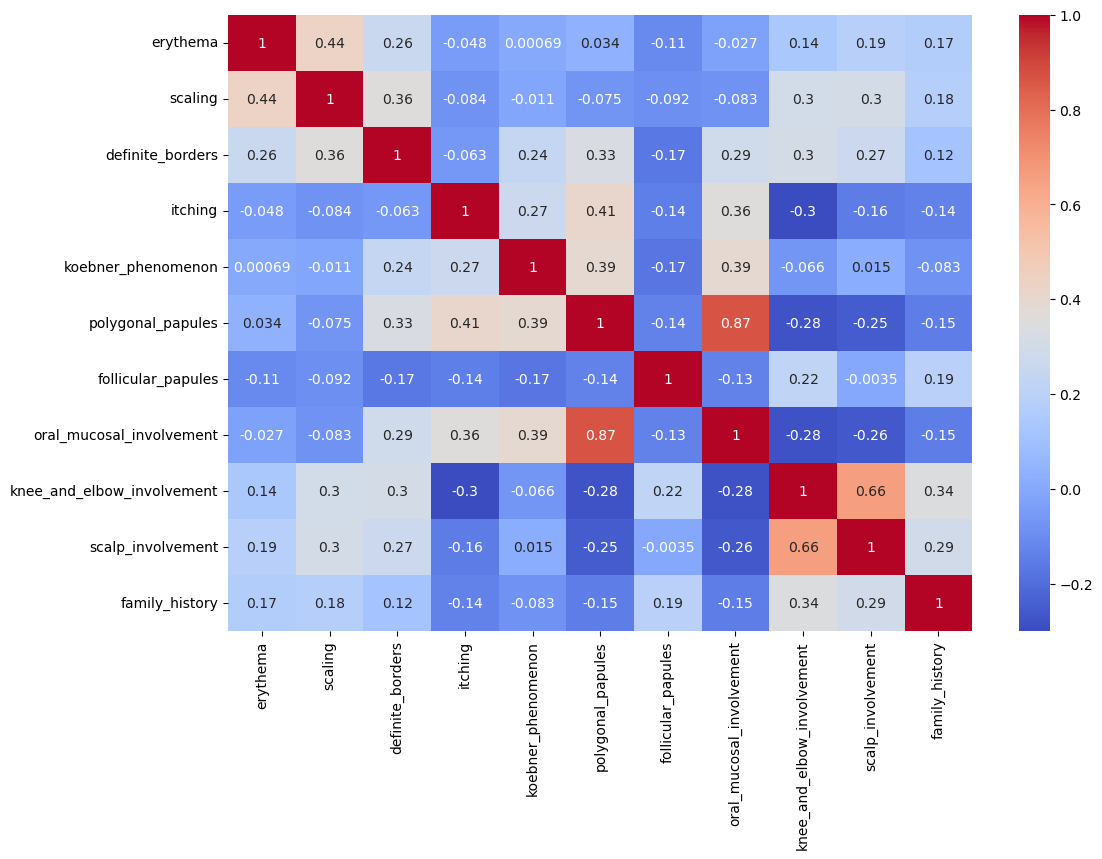

In [5]:
# Klinik değişkenler için korelasyon matrisi
clinical_columns = [
    'erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 
    'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'Age'
]

clinical_corr_matrix = data[clinical_columns].corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(clinical_corr_matrix, annot=True, cmap='coolwarm')
plt.show()


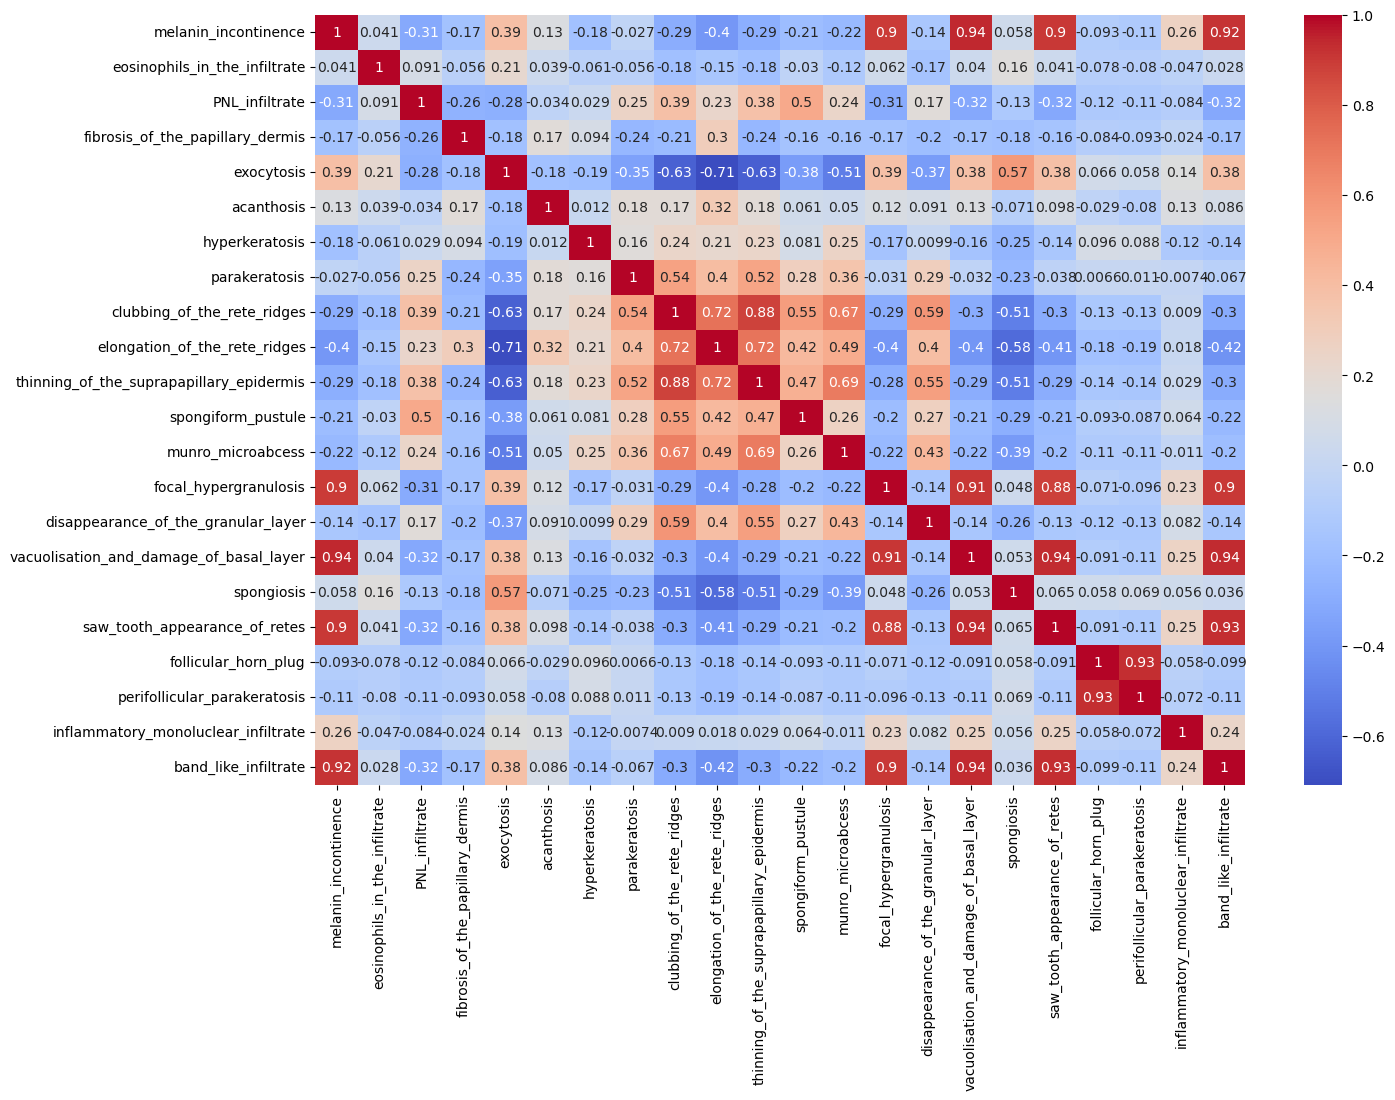

In [6]:
# Histopatolojik değişkenler için korelasyon matrisi
histopathological_columns = [
    'melanin_incontinence', 'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
    'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis', 
    'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges', 
    'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis',
    'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 
    'disappearance_of_the_granular_layer', 'vacuolisation_and_damage_of_basal_layer',
    'spongiosis', 'saw_tooth_appearance_of_retes', 'follicular_horn_plug', 
    'perifollicular_parakeratosis', 'inflammatory_monoluclear_infiltrate', 
    'band_like_infiltrate'
]

histopathological_corr_matrix = data[histopathological_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(histopathological_corr_matrix, annot=True, cmap='coolwarm')
plt.show()


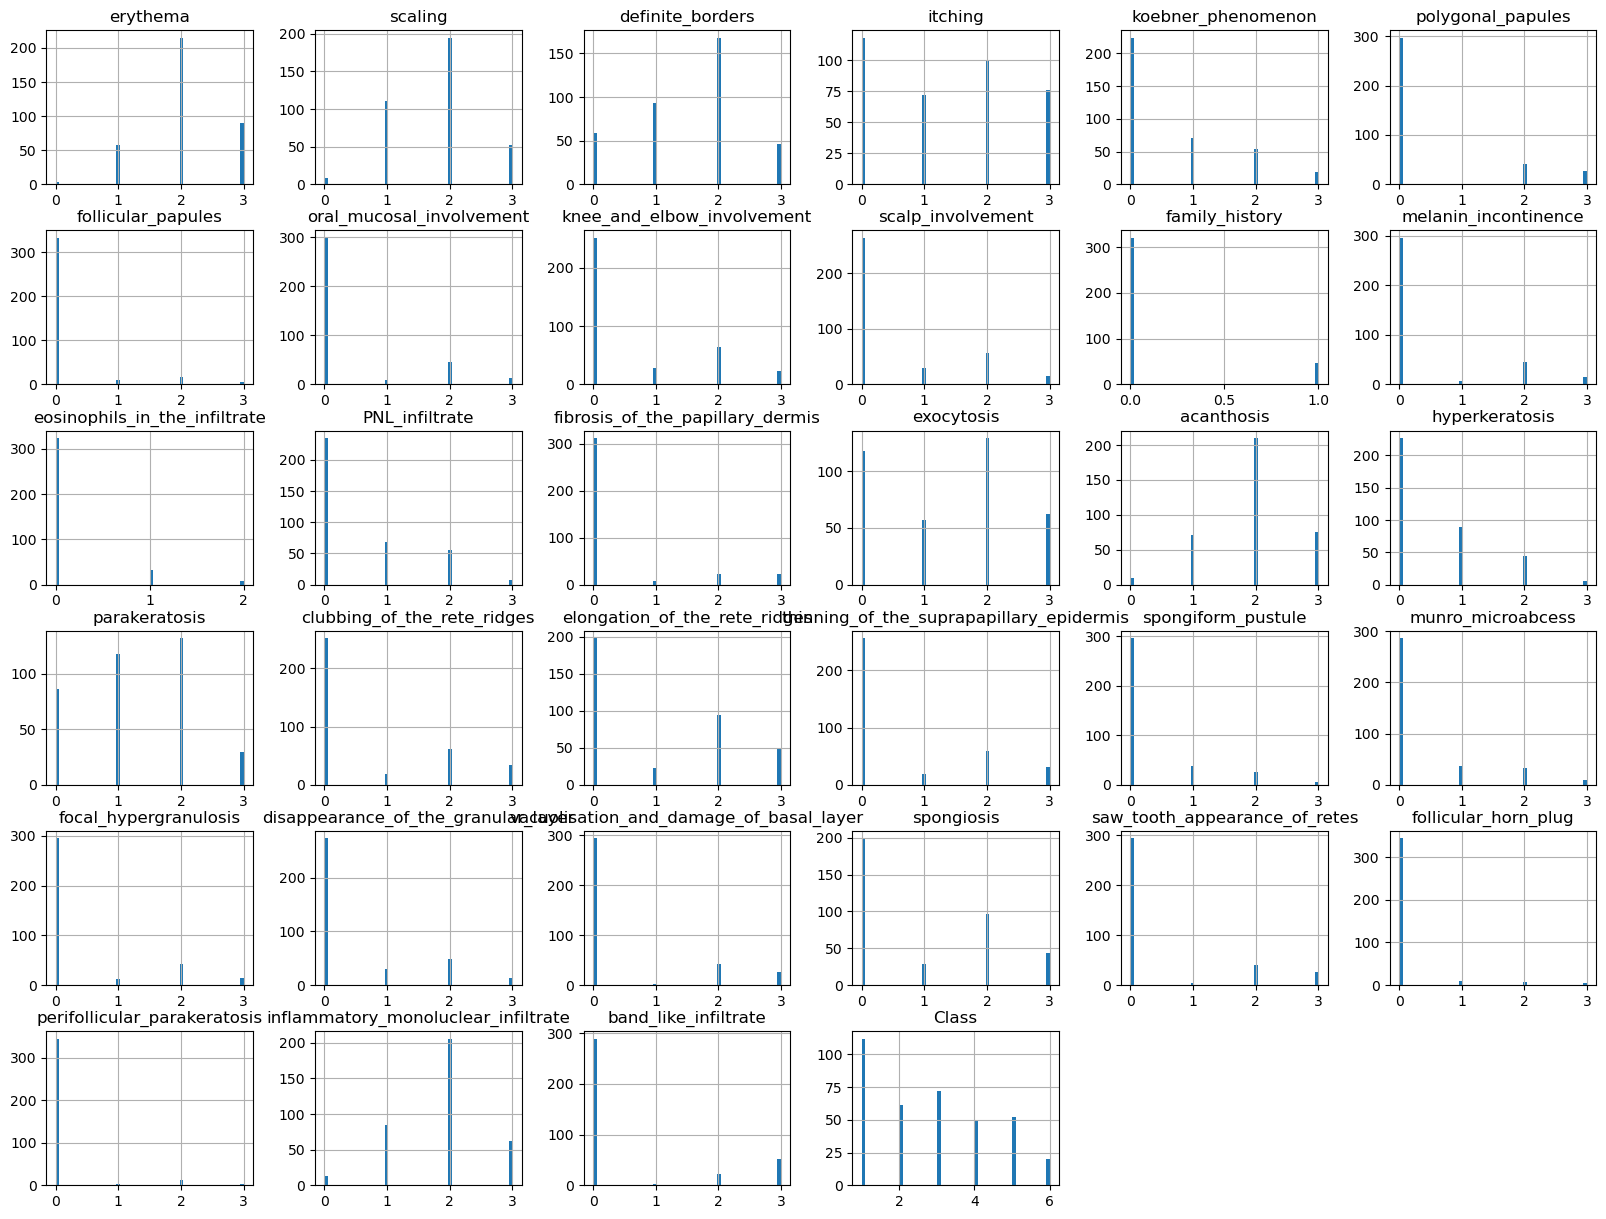

In [7]:
# Histogramlar
data.hist(bins=50, figsize=(20, 15))
plt.show()


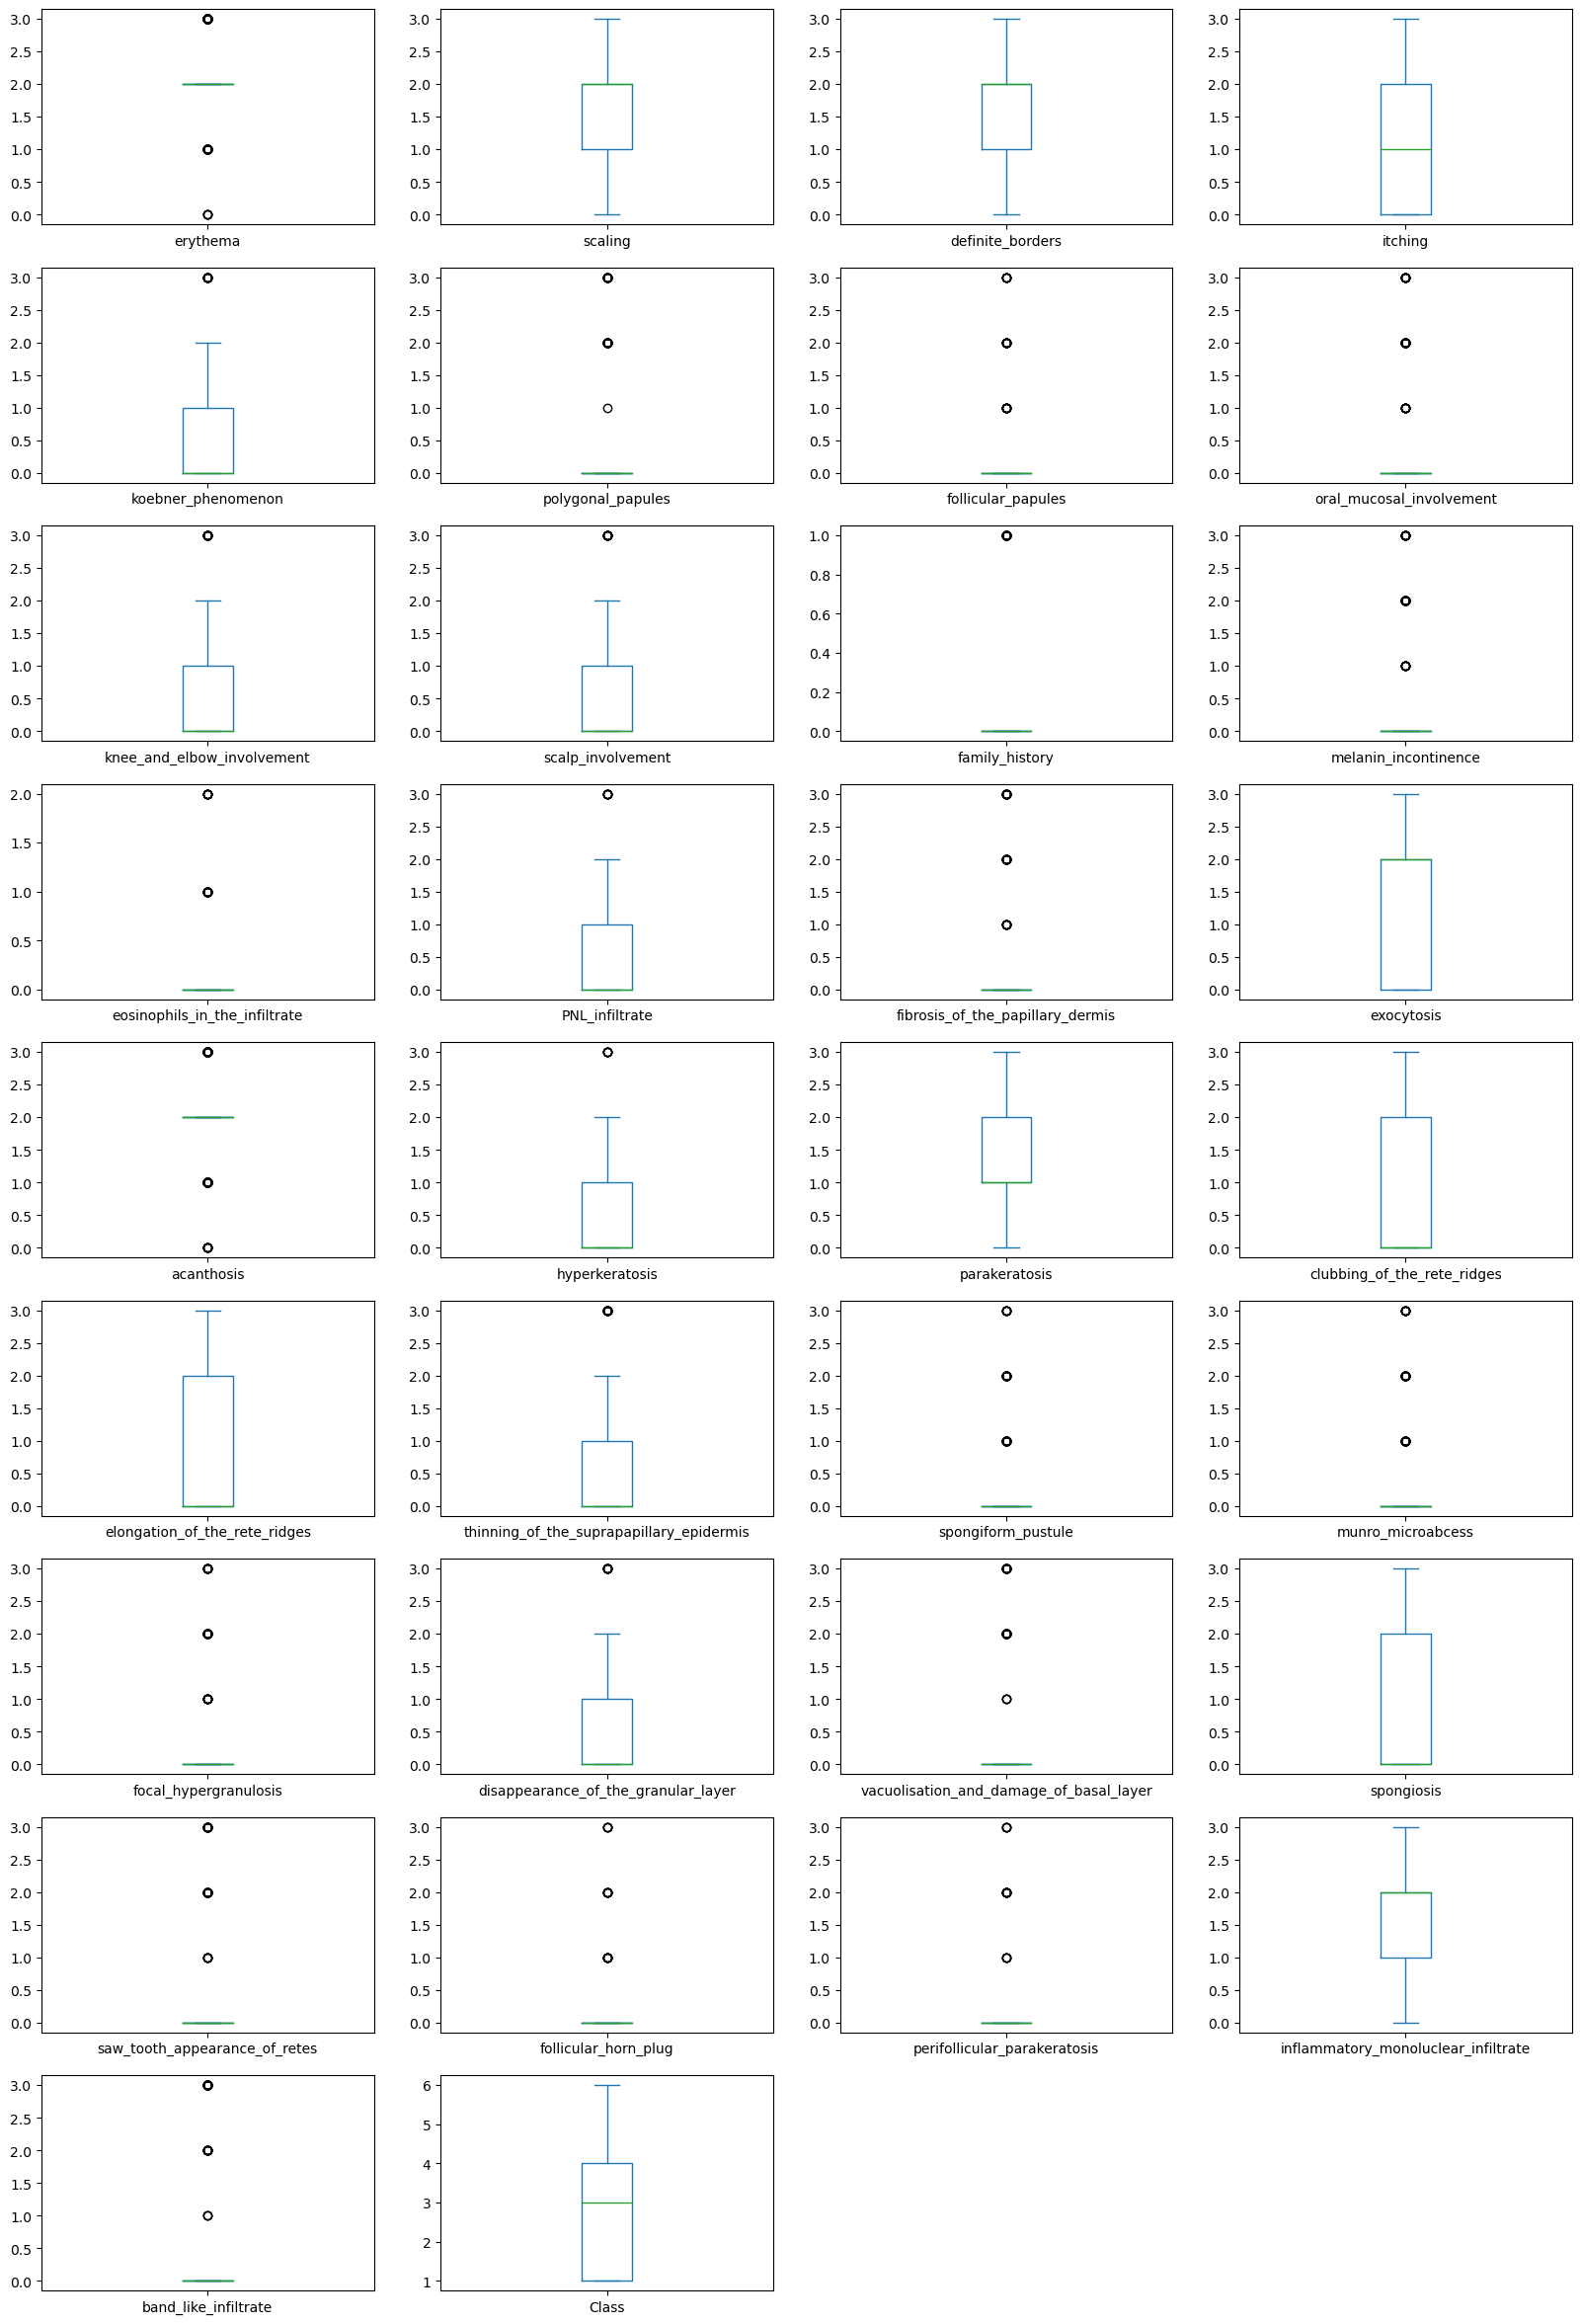

In [8]:
# Kutu grafikleri
data.plot(kind='box', subplots=True, layout=(9,4), sharex=False, sharey=False, figsize=(20, 30))
plt.show()


In [9]:
# Eksik değerlerin olup olmadığını kontrol edin
print(data.isnull().sum())



erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [10]:
# Sayısal olmayan değerlerin kontrolü
for column in data.columns:
    if data[column].dtype == 'object':
        print(f"Non-numeric column found: {column}")

Non-numeric column found: Age


In [11]:
# 'Age' sütunundaki geçersiz değerleri kaldırma veya düzeltme
# Sayısal olmayan değerleri NaN yapma
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')


In [12]:
# Eksik değerleri uygun yöntemlerle doldurun 
average_age = data['Age'].mean()
data['Age'] = data['Age'].fillna(average_age)

In [13]:
# Veriyi özellikler ve hedef olarak ayırma
features = data.drop('Class', axis=1)
target = data['Class']

# Veriyi ölçeklendirme
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Ölçeklendirilmiş verileri ve hedef değişkeni birleştirme
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['Class'] = target

In [14]:
# Veriyi eğitim ve test setlerine bölme
from sklearn.model_selection import train_test_split

X = scaled_data.drop('Class', axis=1)
y = scaled_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Sayısal sütunları normalleştirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
print(scaled_data.head())

   erythema   scaling  definite_borders   itching  koebner_phenomenon  \
0 -0.102895  0.292503         -1.709375  1.437334           -0.699049   
1  1.403482  1.719916          1.600843  0.557628            0.403761   
2 -0.102895 -1.134911          0.497437  1.437334            0.403761   
3 -0.102895  0.292503          0.497437 -1.201784           -0.699049   
4 -0.102895  1.719916          0.497437  0.557628            1.506571   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0          -0.468702           -0.292496                 -0.452637   
1          -0.468702           -0.292496                 -0.452637   
2           2.669312           -0.292496                  3.148777   
3          -0.468702           -0.292496                 -0.452637   
4           1.623308           -0.292496                  1.948306   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                    0.392453          -0.574000  ...   
1                    0.392

In [17]:
# K değerlerini belirleme
k_values = list(range(1, 21))

# Çapraz doğrulama kullanarak performansı değerlendirme
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# En iyi K değerini bulma
best_k = k_values[cv_scores.index(max(cv_scores))]
print("En iyi K değeri:", best_k)

# KNN modelini oluşturma ve eğitme
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# Modeli kullanarak tahmin yapma
y_pred = knn.predict(X_test_scaled)

# Test setinde doğruluk değerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

En iyi K değeri: 6
KNN Accuracy: 0.9864864864864865


In [25]:
# Karar Ağacı modelini oluşturma
dt = DecisionTreeClassifier(max_depth=7)  # Max_depth değeri 7 olarak seçildi
dt.fit(X_train_scaled, y_train)

# Modeli kullanarak tahmin yapma
y_pred = dt.predict(X_test_scaled)

# Test setinde doğruluk değerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.9864864864864865


In [19]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes modelini oluşturma
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Modeli kullanarak tahmin yapma
y_pred = nb.predict(X_test_scaled)

# Test setinde doğruluk değerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

Naive Bayes Accuracy: 0.9054054054054054


In [28]:
# Random Forest modelini oluşturma
rf = RandomForestClassifier(n_estimators=100, max_depth=10)  # 100 ağaç ve maksimum derinlik 10 olarak belirlendi
rf.fit(X_train_scaled, y_train)

# Modeli kullanarak tahmin yapma
y_pred = rf.predict(X_test_scaled)

# Test setinde doğruluk değerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 1.0


In [21]:
# SVM modelini oluşturma
svm = SVC(C=100, gamma=0.01)  # C=100 ve gamma=0.01 olarak belirlendi
svm.fit(X_train_scaled, y_train)

# Modeli kullanarak tahmin yapma
y_pred = svm.predict(X_test_scaled)

# Test setinde doğruluk değerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.9864864864864865


In [35]:
# KNN
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': range(1, 31)}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train_scaled, y_train)
knn_best = knn_grid.best_estimator_
knn_accuracy = knn_best.score(X_test_scaled, y_test)
print(f'KNN Best Parameters: {knn_grid.best_params_}')
print(f'KNN Accuracy: {knn_accuracy}')

# Decision Tree
dt = DecisionTreeClassifier()
dt_params = {'max_depth': range(1, 21)}
dt_grid = GridSearchCV(dt, dt_params, cv=5)
dt_grid.fit(X_train_scaled, y_train)
dt_best = dt_grid.best_estimator_
dt_accuracy = dt_best.score(X_test_scaled, y_test)
print(f'Decision Tree Best Parameters: {dt_grid.best_params_}')
print(f'Decision Tree Accuracy: {dt_accuracy}')

# Random Forest

#GridSearchCV hiperparametresi
rf = RandomForestClassifier()
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': range(1, 10)}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train_scaled, y_train)
rf_best = rf_grid.best_estimator_
rf_accuracy = rf_best.score(X_test_scaled, y_test)
print(f'Random Forest Best Parameters: {rf_grid.best_params_}')
print(f'Random Forest Accuracy: {rf_accuracy}')

# SVM
svm = SVC()
svm_params = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train_scaled, y_train)
svm_best = svm_grid.best_estimator_
svm_accuracy = svm_best.score(X_test_scaled, y_test)
print(f'SVM Best Parameters: {svm_grid.best_params_}')
print(f'SVM Accuracy: {svm_accuracy}')




KNN Best Parameters: {'n_neighbors': 6}
KNN Accuracy: 0.9864864864864865
Decision Tree Best Parameters: {'max_depth': 7}
Decision Tree Accuracy: 0.9864864864864865
Random Forest Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Random Forest Accuracy: 0.9864864864864865
SVM Best Parameters: {'C': 100, 'gamma': 0.01}
SVM Accuracy: 0.9864864864864865
